# 트리 위의 게임
- 엘리스 알고리즘 챌린지 Day 4

---

## [문제 설명]

정점 $N$개의 트리에서 두 사람이 게임을 진행하려 한다.

각 정점은 1번부터 $N$번까지 번호가 매겨져 있고 루트노드는 1번 노드이다.

게임은 서로 턴을 번갈아 가며 진행되고 트리 위에 놓을 수 있는 말과 함께 진행된다.

두 사람의 점수는 모두 0점으로 시작한다.

각 턴마다 두 사람은 다음과 같은 작업을 반복한다.

- 현재 말이 놓여 있는 정점의 번호만큼 자신의 점수에 더한다.
- 현재 말이 놓여 있는 정점의 자식 정점이 없다면 그대로 게임을 종료한다. 자식 정점이 존재한다면 자식 정점 중 원하는 자식 정점으로 말을 옮긴다.

게임이 종료되었을 때 선공의 점수가 후공의 점수보다 높거나 같다면 선공이 승리하고 아니라면 후공이 승리한다.

두 사람이 최적으로 플레이할 때, 처음 말이 놓여져 있는 정점의 번호에 따라 선공이 이기는지 후공이 이기는지 구해보자.

## [지시사항]

### 입력

- 첫째 줄에 정점의 수 $N$이 주어진다. ($1≤N≤100000$)
- 둘째 줄부터 $N$−1개의 줄에 간선을 나타내는 정수 $u$, $v$가 주어진다.($1≤u,\space v≤N$)
- 이는 $u$번 정점과 $v$번 정점을 잇는 간선이 존재한다는 뜻이다.

### 출력

- $N$개의 줄에 걸쳐 정답을 출력한다.
- $i$번째 줄에는 말의 시작위치가 $i$번 정점일 때의 결과를 출력한다.
- 선공이 이긴다면 1을 후공이 이긴다면 0을 출력한다.

### 입력 예시 1

```
5
1 3
2 1
3 4
5 1
```

### 출력 예시 1

```
1
1
0
1
1
```

### 입력 예시 2

```
6
1 3
1 2
3 5
3 6
2 4
```

### 출력 예시 2

```
1
0
0
1
1
1
```

---

## [풀이]

In [1]:
from collections import deque

# n = int(input())
n = 5
trees = {i: [] for i in range(1, n + 1)}
links = {i: [] for i in range(1, n + 1)}

# 간선 받아오기
# for _ in range(n - 1):
for txt in ['1 3', '2 1', '3 4', '5 1']:
#     u, v = map(int, input().split())
    u, v = map(int, txt.split())
    trees[u].append(v)
    trees[v].append(u)

# 트리 구조에서 부모, 자식 구분하기
queue = deque([1]) #루트 노드
visited_to_queue = [0 for _ in range(n)]
while queue:
    parent = queue.popleft()
    visited_to_queue[parent - 1] = 1
    for child in trees[parent]:
        if not visited_to_queue[child - 1]:
            links[parent].append(child)
            queue.append(child)
            visited_to_queue[child - 1] = 1

# 후위 순회로 점수 역산
def calculate_score(links, node, depth, scores):
    if node in links:
        for child in links[node]:
            scores = calculate_score(links, child, depth + 1, scores)
    
    # 자식 노드가 없으면 0:0에서 단순 계산
    if len(links[node]) == 0:
        if depth % 2 == 0: #후공
            scores[node] = [0, -node]
        elif depth % 2 == 1: #선공
            scores[node] = [-node, 0]
        
    # 자식 노드가 하나뿐이면 자식 노드 값 불러와서 단순 계산
    elif len(links[node]) == 1:
        last_scores = scores[links[node][0]]
        if depth % 2 == 0: #후공
            scores[node] = [last_scores[0], last_scores[1] - node]
        elif depth % 2 == 1: #선공
            scores[node] = [last_scores[0] - node, last_scores[1]]

    # 자식 노드가 두 개 이상이면(분기되는 부분이면) 최선의 선택
    elif len(links[node]) >= 2:
        if depth % 2 == 0: #후공
            max_gap = scores[links[node][0]][0] - scores[links[node][0]][1]
            max_gap_node = links[node][0]
            for child in links[node][1:]:
                gap = scores[child][0] - scores[child][1]
                if gap > max_gap:
                    max_gap = gap
                    max_gap_node = child
            last_scores = scores[max_gap_node]
            scores[node] = [last_scores[0], last_scores[1] - node]
        elif depth % 2 == 1: #선공
            max_gap = scores[links[node][0]][1] - scores[links[node][0]][0]
            max_gap_node = links[node][0]
            for child in links[node][1:]:
                gap = scores[child][1] - scores[child][0]
                if gap > max_gap:
                    max_gap = gap
                    max_gap_node = child
            last_scores = scores[max_gap_node]
            scores[node] = [last_scores[0] - node, last_scores[1]]
    return scores

for i in range(1, n + 1):
    scores = calculate_score(links, i, 0, {})
    if scores[i][0] >= scores[i][1]: #시작 위치 기준 판단
        print(1)
    else:
        print(0)

1
1
0
1
1


---

## [후기]

### 주요 내용

- 딕셔너리 형태로 트리 받아오기
    - **루트 노드**인 1을 기준으로 **BFS 탐색**
    - 부모와 자식이 판별되는 **순방향 트리** 딕셔너리 완성
- **후위 순회**하면서 노드별 스코어 계산 (상대방의 점수를 올리는 대신 **선택권자의 점수 차감**)
    - 현재 노드의 자식 노드가 0개 또는 1개인 경우 선택권자의 **점수 감산**
    - 현재 노드의 자식 노드가 2개 이상인 경우 선택권자 기준 **최적의 자식 노드** 판별 후 선택권자의 **점수 감산**

### 소감

- 정말 너무 너무 어려웠음...
- **간선의 방향**이 무작위여서, 부모와 자식을 직접 구별해줘야 했던 점이 1차 관문이었음.
- 트리 형태를 완벽하게 받아온 이후에도 **어떻게 탐색**할지가 난관이었음. 최초에는 DFS로 풀어보고자 하였으나, **두 플레이어**가 각자의 최적으로 플레이하는 점을 구현할 길이 보이지 않았음(매 턴마다 DFS를 계속 돌리기에는 연산량이 과도하게 많아지는 점).
- 결국 DFS를 파기하고, 가장 하위 노드로부터 **후위 순회**하면서 **점수를 역산**해 나가는 방식을 활용했음. 이 과정에서, 자식 노드가 두 개 이상인 경우 **최적을 판별**하도록 해야 했던 점과, **depth 기준**으로 선택권자를 판별하여 일일이 조건을 걸어줘야 했던 점이 꽤나 까다로웠음.

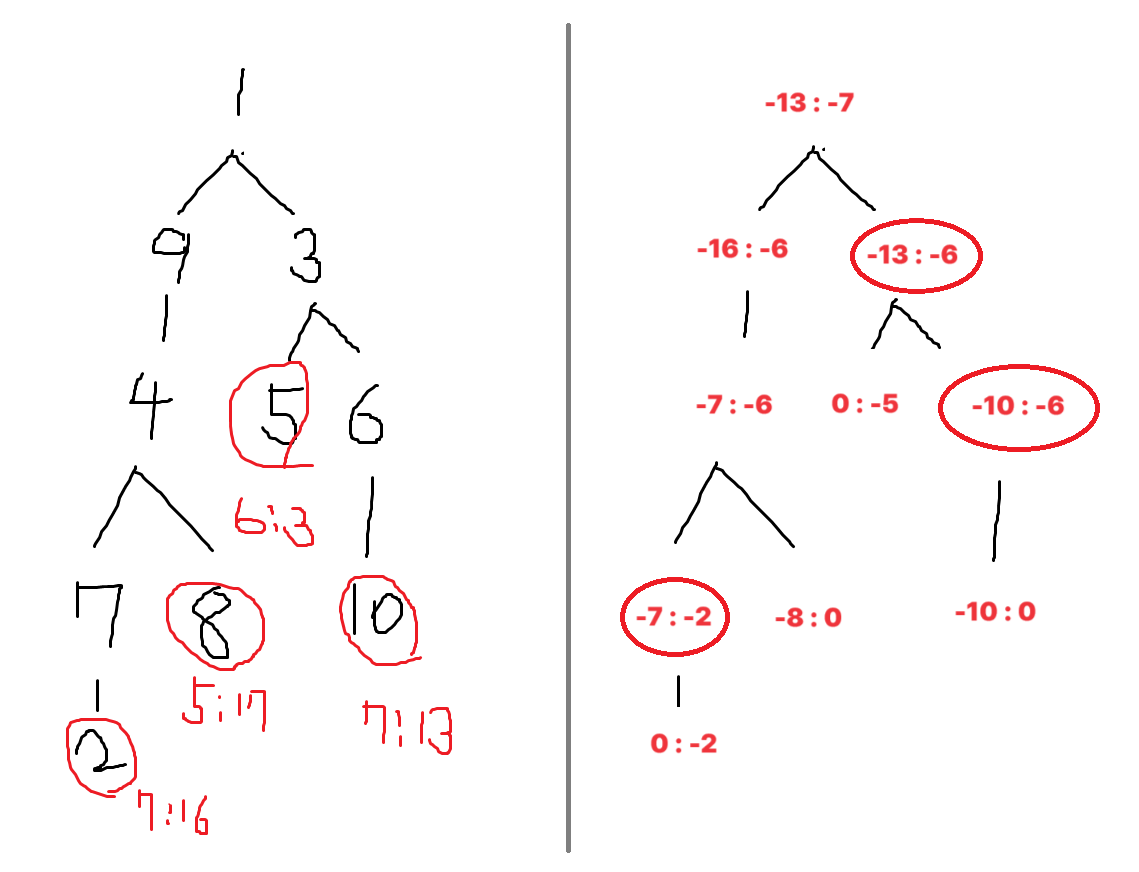